https://github.com/krutofal/homework/blob/main/2.3.2%20hw.ipynb

# A/B тестирование

В рекламной компании участвуют два объявления A и B. Действие показа и перехода отмечено в базе как 1, показ без перехода - 0. Необходимо определить объявление с лучшей конверсией.

## Формулируем гипотезу

**$H_0$** гипотеза - конверсии по объявлениям А и B равны.  
**$H_1$** гипотеза - конверсии по объявлениям А и B не равны.

## Тестирование

### импортируем библиотеки

In [4]:
import pandas as pd
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

import statsmodels.stats.proportion as proportion
import statsmodels.stats.power as smp

import warnings
warnings.simplefilter('ignore')

### загружаем данные

In [5]:
df = pd.read_csv('ad.csv')
df.head()

,ad_id,action
0,B,1
1,B,1
2,A,0
3,B,0
4,A,1


### знакомимся с данными

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ad_id   2000 non-null   object
 1   action  2000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


Датафрейм содержит 2000 записей, пропущенных данных нет

In [7]:
df.groupby('ad_id').describe()

action                                          
        count   mean       std  min  25%  50%  75%  max
ad_id                                                  
A      1000.0  0.304  0.460213  0.0  0.0  0.0  1.0  1.0
B      1000.0  0.372  0.483580  0.0  0.0  0.0  1.0  1.0

array([<AxesSubplot:title={'center':'A'}>,
       <AxesSubplot:title={'center':'B'}>], dtype=object)

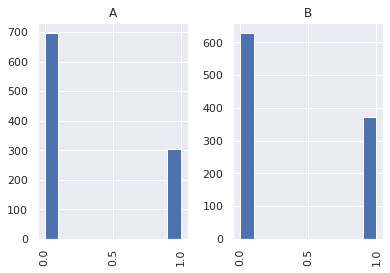

In [8]:
df.hist(by='ad_id')

Данные в action принимают значения только 0 и 1, распределение не нормальное, столбец action номинативный.

### подготовка данных и функций

In [9]:
# разделим датафрейм по типам объявлений
A = df[df.ad_id == 'A'].action
B = df[df.ad_id == 'B'].action

In [10]:
#
A_click = A.sum()        # количество кликов объявления А
A_all = len(A)           # общее количество показов объявления A
A_conv = A_click/A_all   # конверсия объявления А
B_click = B.sum()        # количество кликов объявления B
B_all = len(B)           # общее количество показов объявления B
B_conv = B_click/B_all   # конверсия объявления B

def check_p_value(p_value): # оценка p-value
    print('p-value: ',p_value)
    if (p_value < 0.05):
        print('отклоняем нулевую гипотезу, обнаружены статистически значимые различия')
        if(A_conv > B_conv):
            print('объявление A лучше чем B')
        else:
            print('объявление B лучше чем A')
    else:
        print('нулевую гипотезу не отклоняем, статистически значимые различия не обнаружены')

### Z-критерий равенства пропорций (дихотомическая переменная, большая выборка )

In [19]:
zstat, p_value = proportion.proportions_ztest([A_click, B_click],
                                              [A_all,   B_all])
check_p_value(p_value)

p-value:  0.0013069502732125403
отклоняем нулевую гипотезу, обнаружены статистически значимые различия
объявление B лучше чем A


### тест ХИ*$^2$* равенства пропорций

In [11]:
chi2stat, p_value, table = proportion.proportions_chisquare([A_click, B_click],
                                                            [A_all,   B_all])
check_p_value(p_value)

p-value:  0.0013069502732125406
отклоняем нулевую гипотезу, обнаружены статистически значимые различия
объявление B лучше чем A


### тест ХИ*$^2$* независимости наблюдаемых частот

In [12]:
data = np.array([A.value_counts(), B.value_counts()])
data

array([[696, 304],
       [628, 372]])

In [13]:
chi2, p, dof, expected = stats.chi2_contingency(data)
check_p_value(p)

p-value:  0.0015392611623486726
отклоняем нулевую гипотезу, обнаружены статистически значимые различия
объявление B лучше чем A


### t-критерий Стьюдента

In [14]:
t_test, t_p = stats.ttest_1samp(B, A.mean())
check_p_value(t_p)

p-value:  9.695749977260145e-06
отклоняем нулевую гипотезу, обнаружены статистически значимые различия
объявление B лучше чем A


### t-критерий Уэлча (t критерий при неравенстве дисперсий)

In [15]:
# тест Левена, проверка на однородность дисперсий
statistic, pvalue = stats.levene(A, B)
res = 'дисперсии не равны' if pvalue < 0.05 else 'дисперсии равны'
'p_value = {}, {} '.format(pvalue, res)

'p_value = 0.0012971905467120167, дисперсии не равны '

In [16]:
t_test, t_p = stats.ttest_ind(A, B, equal_var=False)
check_p_value(t_p)

p-value:  0.0012972410374001632
отклоняем нулевую гипотезу, обнаружены статистически значимые различия
объявление B лучше чем A


### U-критерий Манна-Уитни

In [17]:
u_test, u_p = stats.mannwhitneyu(A, B)
check_p_value(u_p)

p-value:  0.0013108294159419323
отклоняем нулевую гипотезу, обнаружены статистически значимые различия
объявление B лучше чем A
